In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv(r"SpotifyFeatures.csv")
print(df.head())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [45]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [47]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [3]:
plt.figure(figsize=(50,30))
ax=sns.countplot(data=df,x="genre")
ax.bar_label(ax.containers[0])

plt.show()

NameError: name 'plt' is not defined

In [49]:
gb=df.groupby("popularity").agg({"loudness":'mean',"liveness":'mean',"speechiness":'mean',"instrumentalness":'mean'})
print(gb)

             loudness  liveness  speechiness  instrumentalness
popularity                                                    
0          -14.037291  0.201675     0.119221          0.198437
1          -12.313908  0.210942     0.107862          0.098718
2          -14.290355  0.218825     0.109361          0.155929
3          -14.626197  0.222869     0.103085          0.178328
4          -15.550893  0.234592     0.086878          0.189394
...               ...       ...          ...               ...
96          -7.284375  0.170675     0.208975          0.001067
97          -5.622600  0.128540     0.056310          0.000003
98          -2.652000  0.057400     0.059300          0.000002
99          -6.344500  0.103500     0.134850          0.000001
100        -10.744000  0.088400     0.323000          0.000000

[101 rows x 4 columns]


In [50]:
plt.figure(figsize=(100,100))
sns.heatmap(gb,annot=True)
plt.show()

In [51]:
df["duration_ms"]=df["danceability"]
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [52]:
gb1=df.groupby("genre").agg({"popularity":'mean',"acousticness":'mean',"danceability":'mean',"liveness":'mean'})
print(gb1)

                  popularity  acousticness  danceability  liveness
genre                                                             
A Capella           9.302521      0.829941      0.412252  0.136924
Alternative        50.213430      0.162313      0.541898  0.196985
Anime              24.258729      0.286843      0.472090  0.192391
Blues              34.742879      0.327840      0.528232  0.233125
Children's Music    4.252637      0.591781      0.697475  0.164894
Children’s Music   54.659040      0.163175      0.541843  0.195015
Classical          29.282195      0.868843      0.305958  0.162810
Comedy             21.342630      0.793098      0.559038  0.724775
Country            46.100416      0.270172      0.577038  0.187216
Dance              57.275256      0.152888      0.638191  0.187753
Electronic         38.056095      0.119839      0.619542  0.210006
Folk               49.940209      0.463201      0.527276  0.170773
Hip-Hop            58.423131      0.176172      0.718808  0.20

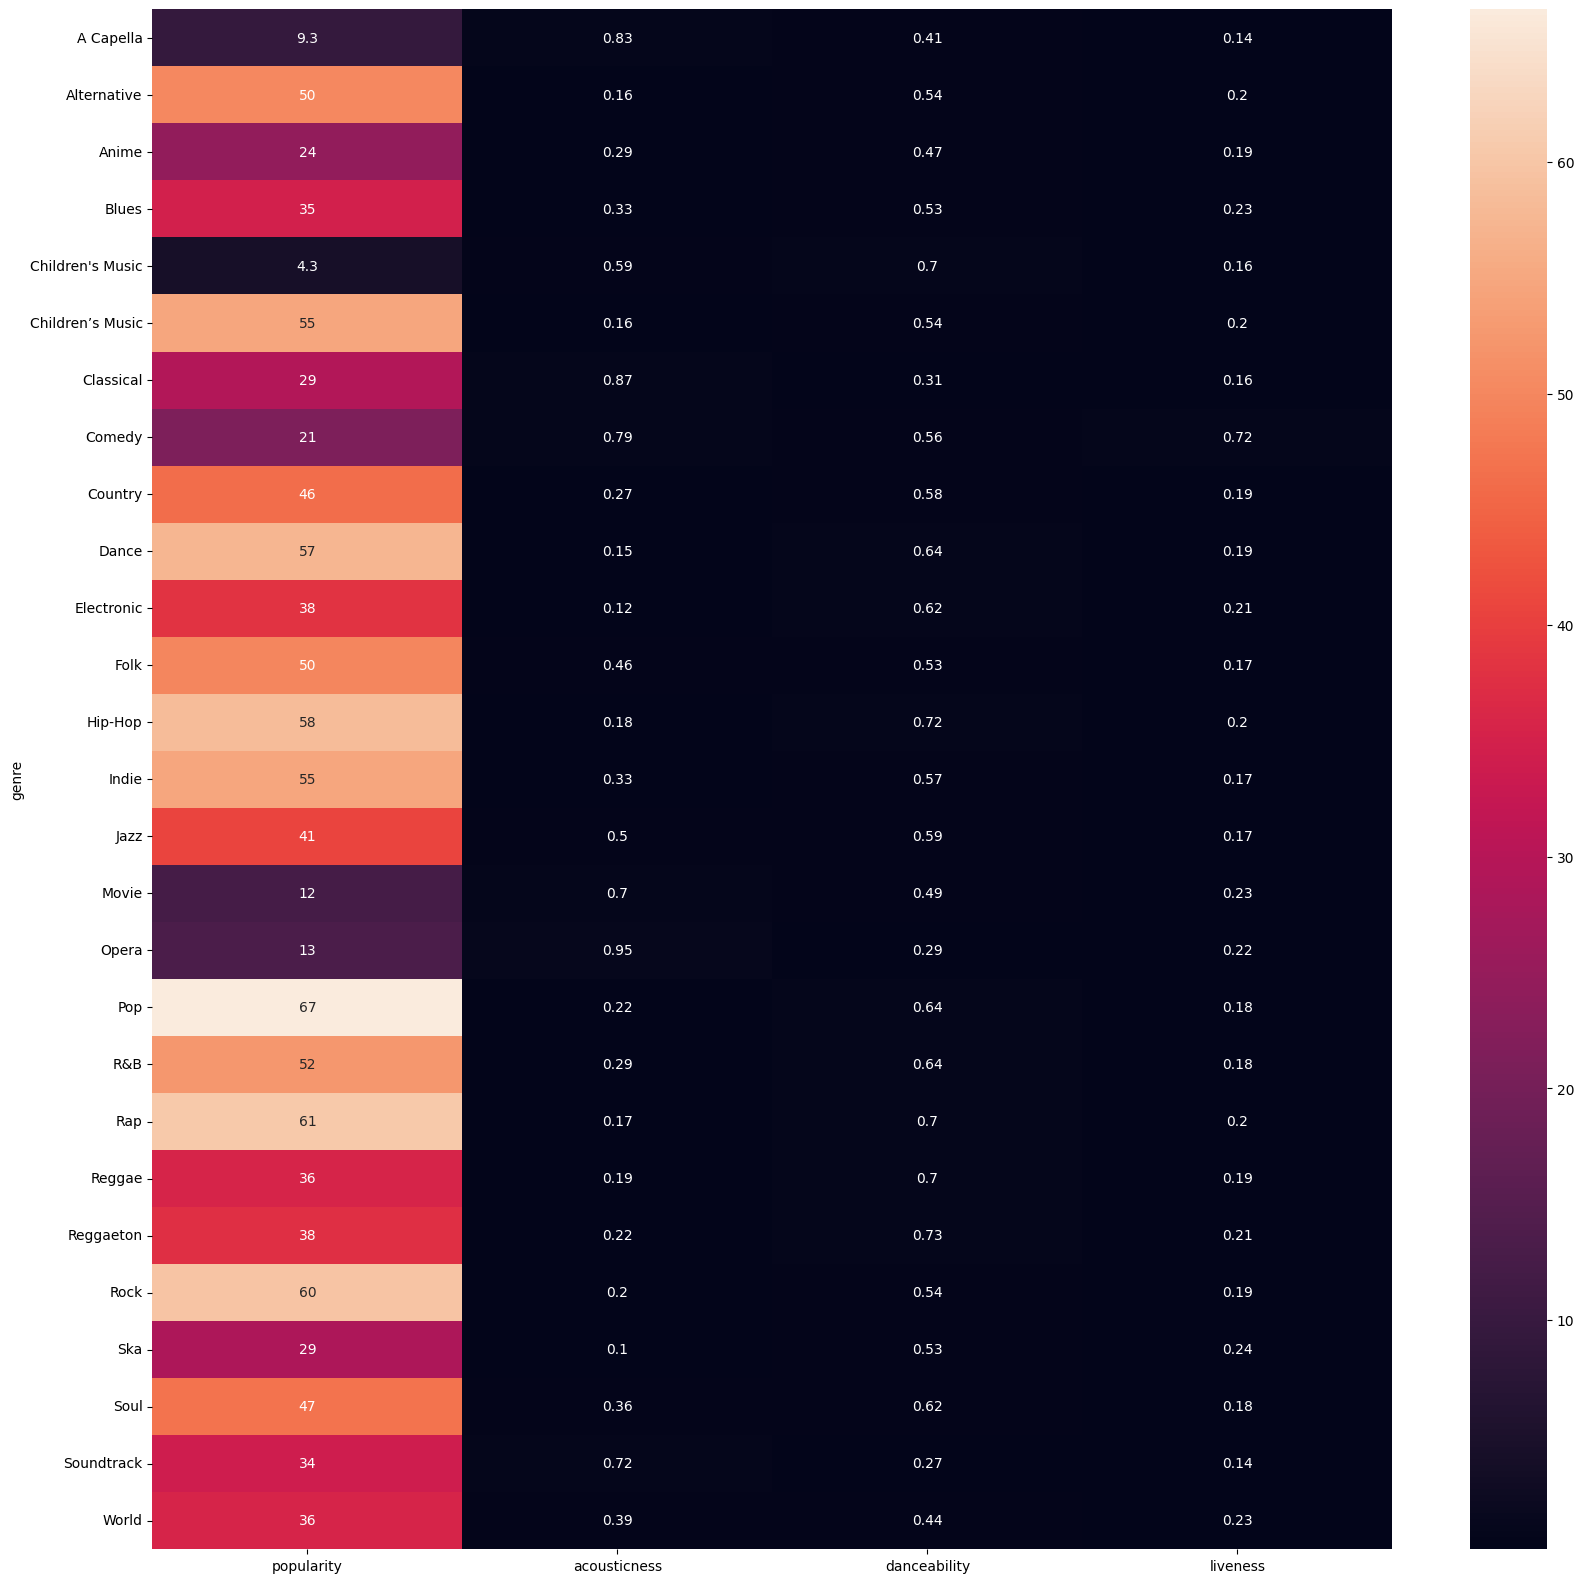

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(gb1,annot=True)
plt.show()

In [54]:
print(df["key"].unique())


['C#' 'F#' 'C' 'F' 'G' 'E' 'D#' 'G#' 'D' 'A#' 'A' 'B']


In [55]:
groupA=df.loc[(df['key']=="C#")].count()
print(groupA)

genre               23201
artist_name         23201
track_name          23201
track_id            23201
popularity          23201
acousticness        23201
danceability        23201
duration_ms         23201
energy              23201
instrumentalness    23201
key                 23201
liveness            23201
loudness            23201
mode                23201
speechiness         23201
tempo               23201
time_signature      23201
valence             23201
dtype: int64


In [56]:

groupB=df.loc[(df['key']=="F#")].count()
print(groupB)

groupC=df.loc[(df['key']=="F")].count()
print(groupC)

groupD=df.loc[(df['key']=="C#")].count()
print(groupD)


groupE=df.loc[(df['key']=="G")].count()
print(groupE)


groupF=df.loc[(df['key']=="E")].count()
print(groupF)


groupG=df.loc[(df['key']=="D#")].count()
print(groupG)


groupH=df.loc[(df['key']=="G#")].count()
print(groupH)


groupI=df.loc[(df['key']=="D")].count()
print(groupI)


groupJ=df.loc[(df['key']=="A#")].count()
print(groupJ)


groupK=df.loc[(df['key']=="A")].count()
print(groupK)


groupL=df.loc[(df['key']=="B")].count()
print(groupL)

genre               15222
artist_name         15222
track_name          15222
track_id            15222
popularity          15222
acousticness        15222
danceability        15222
duration_ms         15222
energy              15222
instrumentalness    15222
key                 15222
liveness            15222
loudness            15222
mode                15222
speechiness         15222
tempo               15222
time_signature      15222
valence             15222
dtype: int64
genre               20279
artist_name         20279
track_name          20278
track_id            20279
popularity          20279
acousticness        20279
danceability        20279
duration_ms         20279
energy              20279
instrumentalness    20279
key                 20279
liveness            20279
loudness            20279
mode                20279
speechiness         20279
tempo               20279
time_signature      20279
valence             20279
dtype: int64
genre               23201
artist_name 

In [57]:
most_popular=df.query('popularity>90',inplace= False).sort_values('popularity',ascending=False)
most_popular[:10]


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,0.725,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,0.726,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,0.833,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,0.737,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
9037,Dance,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,0.719,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628


In [58]:
sorted_df=df.sort_values('popularity',ascending=True).head(10)
sorted_df


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
67,Movie,Chorus,Om Jayanti Mangla,2YeFJwywiUPeQiUtEeGPyQ,0,0.7910,0.447,0.447,0.253,0.000000,A#,0.0919,-11.927,Major,0.0349,107.940,5/4,0.469
133,Movie,Frank Churchill,"Whistle While You Work - London, Dec. 8, 1938,...",4TVlu8gVdYM53SoW3k7S57,0,0.9870,0.723,0.723,0.158,0.145000,D,0.1150,-16.343,Major,0.0511,110.319,4/4,0.807
99593,Children’s Music,Alanis Morissette,Flinch,3fIBN2VGQ0UkmNvGI9EVDO,0,0.0957,0.519,0.519,0.513,0.000004,A,0.0721,-7.799,Major,0.0254,78.134,4/4,0.186
99600,Children’s Music,Alanis Morissette,Thank You - Christopher Fogel Remix,77e2vxaofxEsL6gyvBnQ54,0,0.2840,0.662,0.662,0.651,0.000151,C,0.1220,-4.793,Major,0.0255,92.213,4/4,0.523
99258,Children’s Music,Talking Heads,Psycho Killer,2Fv1YSZhehdu1UY2C75oOH,0,0.0707,0.721,0.721,0.521,0.005520,D,0.1270,-8.123,Major,0.0612,123.118,4/4,0.942
98730,Children’s Music,KAYTRANADA,Well I Bet Ya,0uBstFReritqiYq3aatGeU,0,0.0052,0.703,0.703,0.638,0.303000,G#,0.2660,-6.397,Minor,0.1440,81.981,4/4,0.777
124329,Classical,Giuseppe Verdi,"Falstaff, Act I Pt. 1: L'onore! Ladri! (Live)",73oShnnY3Iq1luEqmkXs8H,0,0.9290,0.332,0.332,0.241,0.000286,C,0.2860,-20.085,Major,0.2110,94.050,5/4,0.114
97995,Children’s Music,Andrés Calamaro,Te quiero igual,7A0YsIHAvleo2jLWFgnUNq,0,0.1480,0.532,0.532,0.884,0.000007,G,0.1540,-4.941,Major,0.0398,128.074,4/4,0.781
124330,Classical,Giuseppe Verdi,"Falstaff, Act I Pt. 1: Sei polli, sei scellini...",0FC64QBNH2W36qeWlrPykn,0,0.9560,0.343,0.343,0.120,0.000055,D,0.7240,-24.190,Major,0.0688,86.550,4/4,0.208
124,Movie,Jean Claude Corbel,Aladin 1,46pHjxtTwKqyefPMq5HRaO,0,0.6300,0.539,0.539,0.462,0.000000,B,0.1640,-12.981,Minor,0.1360,130.031,4/4,0.409


In [62]:
sns.barplot(x='duration_ms', y='energy', data=SpotifyFeatures)

plt.show()

ValueError: Could not interpret value `duration_ms` for `x`. Value is a string, but `data` was not passed.